### Echo-RNN
The network remembers the input data and then echoes it after a few time-steps.  
This is part 1, building RNN from scratch : [Ref. blog](https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767)  

#### imports

In [10]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#### network constant

In [22]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length


#### data generation  
method to generate seq. data: random binary vector


In [12]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

### Building the Network Graph
#### Placeholders

In [13]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

#### Variables

In [14]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

#### Unpacking

In [15]:
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

#### Forward Pass

In [17]:
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

#### Calculating loss
Softmax layer

In [19]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

#### Visualizing training

In [20]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

#### Run the network

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.79134
Step 100 Loss 0.692811
Step 200 Loss 0.693283
Step 300 Loss 0.713551
Step 400 Loss 0.693797
Step 500 Loss 0.695371
Step 600 Loss 0.692833
New data, epoch 1
Step 0 Loss 0.689263
Step 100 Loss 0.690313
Step 200 Loss 0.708226
Step 300 Loss 0.705073
Step 400 Loss 0.689924
Step 500 Loss 0.678073
Step 600 Loss 0.594903
New data, epoch 2
Step 0 Loss 0.229328
Step 100 Loss 0.0274462
Step 200 Loss 0.0154207
Step 300 Loss 0.0111355
Step 400 Loss 0.00783201
Step 500 Loss 0.00708543
Step 600 Loss 0.00543393
New data, epoch 3
Step 0 Loss 0.172018
Step 100 Loss 0.00633774
Step 200 Loss 0.00549645
Step 300 Loss 0.00456173
Step 400 Loss 0.00372418
Step 500 Loss 0.00350748
Step 600 Loss 0.00319504
New data, epoch 4
Step 0 Loss 0.261644
Step 100 Loss 0.00291408
Step 200 Loss 0.00281469
Step 300 Loss 0.00244826
Step 400 Loss 0.00221438
Step 500 Loss 0.00232479
Step 600 Loss 0.00194934
New data, epoch 5
Step 0 Loss 0.205399
Step 100 Loss 0.00189326
Step 200 Loss 0.001

Step 300 Loss 0.000153804
Step 400 Loss 0.000152868
Step 500 Loss 0.000153279
Step 600 Loss 0.000150209
New data, epoch 43
Step 0 Loss 0.163024
Step 100 Loss 0.000148289
Step 200 Loss 0.000156634
Step 300 Loss 0.000152617
Step 400 Loss 0.000146857
Step 500 Loss 0.00015102
Step 600 Loss 0.000146112
New data, epoch 44
Step 0 Loss 0.260222
Step 100 Loss 0.000149123
Step 200 Loss 0.000154381
Step 300 Loss 0.000150433
Step 400 Loss 0.000153122
Step 500 Loss 0.000150359
Step 600 Loss 0.000159691
New data, epoch 45
Step 0 Loss 0.258673
Step 100 Loss 0.000148806
Step 200 Loss 0.000152036
Step 300 Loss 0.000146104
Step 400 Loss 0.000142948
Step 500 Loss 0.000158887
Step 600 Loss 0.000151064
New data, epoch 46
Step 0 Loss 0.10016
Step 100 Loss 0.000158405
Step 200 Loss 0.000148976
Step 300 Loss 0.000146373
Step 400 Loss 0.000134657
Step 500 Loss 0.000130147
Step 600 Loss 0.000129038
New data, epoch 47
Step 0 Loss 0.162377
Step 100 Loss 0.000130486
Step 200 Loss 0.000130063
Step 300 Loss 0.000138

Step 300 Loss 8.08864e-05
Step 400 Loss 8.61535e-05
Step 500 Loss 7.62473e-05
Step 600 Loss 8.2361e-05
New data, epoch 85
Step 0 Loss 0.148204
Step 100 Loss 7.87047e-05
Step 200 Loss 7.46947e-05
Step 300 Loss 7.84358e-05
Step 400 Loss 8.15206e-05
Step 500 Loss 8.19402e-05
Step 600 Loss 7.73822e-05
New data, epoch 86
Step 0 Loss 0.209151
Step 100 Loss 8.03541e-05
Step 200 Loss 8.34009e-05
Step 300 Loss 7.89555e-05
Step 400 Loss 7.7228e-05
Step 500 Loss 7.69929e-05
Step 600 Loss 7.24298e-05
New data, epoch 87
Step 0 Loss 0.122083
Step 100 Loss 7.74966e-05
Step 200 Loss 8.80208e-05
Step 300 Loss 8.72962e-05
Step 400 Loss 7.87442e-05
Step 500 Loss 8.39919e-05
Step 600 Loss 8.32164e-05
New data, epoch 88
Step 0 Loss 0.26554
Step 100 Loss 7.21882e-05
Step 200 Loss 8.35233e-05
Step 300 Loss 8.02555e-05
Step 400 Loss 6.92386e-05
Step 500 Loss 7.98329e-05
Step 600 Loss 7.3258e-05
New data, epoch 89
Step 0 Loss 0.17867
Step 100 Loss 7.79019e-05
Step 200 Loss 7.58755e-05
Step 300 Loss 8.43783e-05

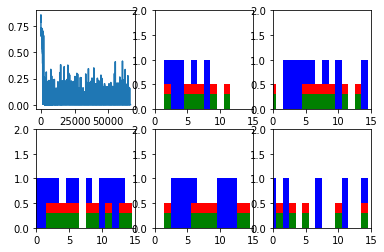

In [23]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()